In [9]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


I had to use the following code to install cartopy on my machine and import the package that was needed. This is what produces the map at the bottom.

In [2]:
conda install -c conda-forge cartopy


^C

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import xarray as xr

ds = xr.open_dataset("C:/Users/iarreola/E484/files/gistemp1200_GHCNv4_ERSSTv5.nc.gz")

ds

<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, time: 1702, nv: 2)
Coordinates:
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2021-10-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] ...
    tempanomaly  (time, lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2021-11-10 10:02:57 by SBBX_to_nc 2.0 - ILAND=1200,...

Found a Medium article that breaks down what we need --> https://towardsdatascience.com/visualizing-climate-change-data-with-python-74ea5bac8756

First, create a time series to a yearly frequency --> climate & anomaly
Next create a static image for the global temperature anomaly for a given year --> cbar_kwargs & below

C:\Users\iarreola\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_countries.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


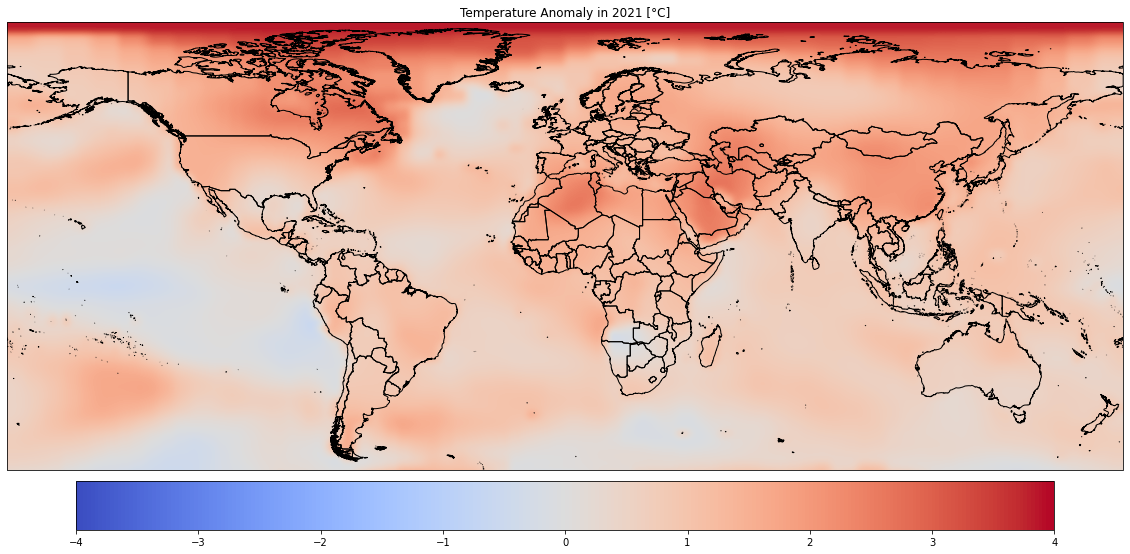

In [5]:
climate = ds.resample(time='Y').mean()
anomaly = climate['tempanomaly']

cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.045,
    'pad': 0.01,
    'extend':'neither'
}

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
                       facecolor='none', edgecolor='black')
ax.set_extent([-150, 150, -55, 85])

i=-1
date =  pd.to_datetime(anomaly.isel(time=i)['time'].values)
ax.set_title("Temperature Anomaly in "+ str(date.year) + " [°C]")
anomaly.isel(time=i).plot.imshow(ax=ax, add_labels=False, add_colorbar=True,
               vmin=-4, vmax=4, cmap='coolwarm',
               cbar_kwargs=cbar_kwargs, interpolation='bicubic')
plt.savefig("global_map.png", bbox_inches='tight', dpi=150)
plt.show()

A NetCDF file has three basic parts: metadata, dimensions and variables. Variables contain both metadata and data. 

Data Arrays can be inspected with the following:

`df.shape`  = shows how many dimensions are present in the data, along with a different lenght for each dimension
`ds.dims` = shows what each dimension is called
`ds.info()` = provides information on the metadata present in the file.


In [38]:
df.shape

(55144800, 2)

In [36]:
ds.dims

Frozen({'lat': 90, 'lon': 180, 'time': 1702, 'nv': 2})

In [5]:
ds.info()

xarray.Dataset {
dimensions:
	lat = 90 ;
	lon = 180 ;
	time = 1702 ;
	nv = 2 ;

variables:
	float32 lat(lat) ;
		lat:standard_name = latitude ;
		lat:long_name = Latitude ;
		lat:units = degrees_north ;
	float32 lon(lon) ;
		lon:standard_name = longitude ;
		lon:long_name = Longitude ;
		lon:units = degrees_east ;
	datetime64[ns] time(time) ;
		time:long_name = time ;
		time:bounds = time_bnds ;
	datetime64[ns] time_bnds(time, nv) ;
	float32 tempanomaly(time, lat, lon) ;
		tempanomaly:long_name = Surface temperature anomaly ;
		tempanomaly:units = K ;
		tempanomaly:cell_methods = time: mean ;

// global attributes:
	:title = GISTEMP Surface Temperature Analysis ;
	:institution = NASA Goddard Institute for Space Studies ;
	:source = http://data.giss.nasa.gov/gistemp/ ;
	:Conventions = CF-1.6 ;
	:history = Created 2021-11-10 10:02:57 by SBBX_to_nc 2.0 - ILAND=1200, IOCEAN=NCDC/ER5, Base: 1951-1980 ;
}

In [21]:
df = ds.to_dataframe()

data = pd.DataFrame(df)

print(data)

                            time_bnds  tempanomaly
lat   lon    time       nv                        
-89.0 -179.0 1880-01-15 0  1880-01-01          NaN
                        1  1880-02-01          NaN
             1880-02-15 0  1880-02-01          NaN
                        1  1880-03-01          NaN
             1880-03-15 0  1880-03-01          NaN
...                               ...          ...
 89.0  179.0 2021-08-15 1  2021-09-01         0.61
             2021-09-15 0  2021-09-01         4.24
                        1  2021-10-01         4.24
             2021-10-15 0  2021-10-01         5.60
                        1  2021-11-01         5.60

[55144800 rows x 2 columns]


The following is doing the same, just using the package `netCDF4`

In [8]:
pip install netCDF4

Note: you may need to restart the kernel to use updated packages.
